In [1]:
import time
import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import datasets as ds
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler


In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore', category=UserWarning)

In [3]:
## 产生模拟数据
n_samples = 1500
np.random.seed(0)
#产生圆形的
noisy_circles = ds.make_circles(n_samples=n_samples, factor=.5, noise=.05)
#产生月牙形
noisy_moons = ds.make_moons(n_samples=n_samples, noise=.05)
#高斯分布
blobs = ds.make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.5, centers=3, random_state=0)
# 随机数据
no_structure = np.random.rand(n_samples, 2), None

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
clusters = [2,2,3,2]

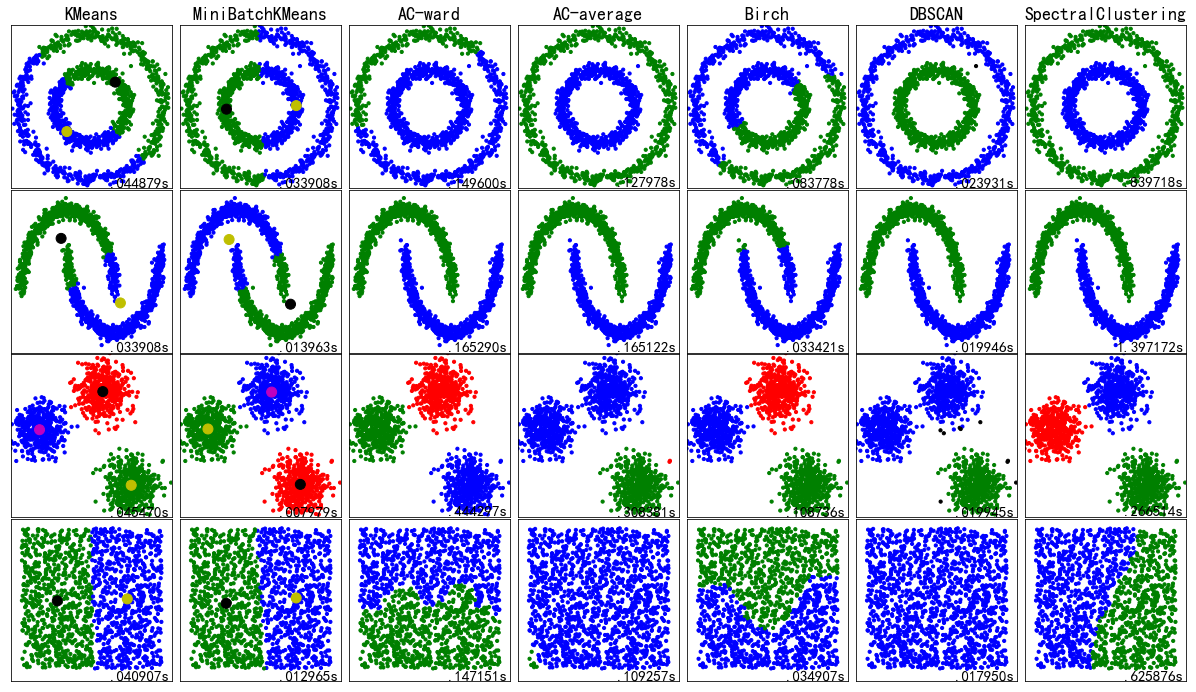

In [4]:
clustering_names = [
    'KMeans', 'MiniBatchKMeans', 'AC-ward', 'AC-average',
    'Birch', 'DBSCAN','SpectralClustering']

## 开始画图
plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5), facecolor='w')
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plot_num = 1

for i_dataset,(dataset, n_cluster) in enumerate(zip(datasets, clusters)):
    X,y = dataset
    X = StandardScaler().fit_transform(X)
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    connectivity = (connectivity + connectivity.T)
    
    km = cluster.KMeans(n_clusters=n_cluster)
    mbkm = cluster.MiniBatchKMeans(n_clusters=n_cluster)
    ward = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='ward')
    average = cluster.AgglomerativeClustering(n_clusters=n_cluster,connectivity=connectivity, linkage='average')
    birch = cluster.Birch(n_clusters=n_cluster)
    dbscan = cluster.DBSCAN(eps=.2)
    spectral = cluster.SpectralClustering(n_clusters=n_cluster, affinity="nearest_neighbors")
    clustering_algorithms = [km, mbkm, ward, average, birch, dbscan, spectral]
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        # 如果模型中存在"labels__"这个属性的话，那么获取这个预测的类别值
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # 画子图
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
        # 如果模型有中心点属性，那么画出中心点
        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[-len(centers):]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()